# Regression and DNN Model 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pydot

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import KFold

print(tf.__version__)

2.4.1


# Get Dataset

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Check Null values

In [4]:
#The dataset contains a few unknown values.
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
#Drop those rows to keep this initial tutorial simple.
dataset = dataset.dropna()

## Data Adjusting 

In [6]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


# Splitting Data to training and testing data

In [7]:
#train_dataset = dataset.sample(frac=0.8, random_state=0)

#test_dataset = dataset.drop(train_dataset.index)



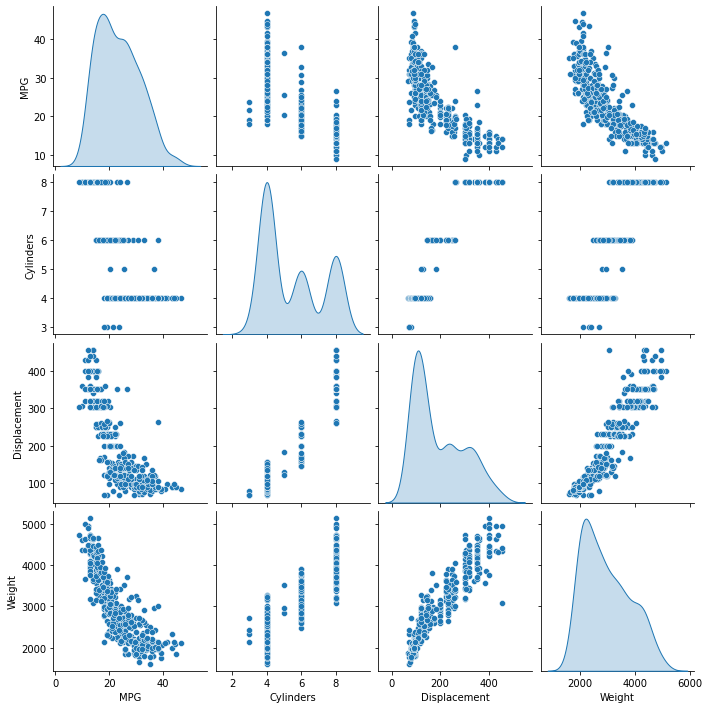

In [8]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [10]:
#In the table of statistics it's easy to see how different the ranges of each feature are.
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.445918,7.805007
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


In [11]:
acc_per_fold = []
loss_per_fold = []

# Keras Functional API Model


In [12]:


def build_and_compile_model_0(norm):
    inputs = keras.Input(shape=(8,))

    dense = layers.Dense(64, activation="relu")
    x = dense(inputs)
    
    x = layers.Dense(64, activation="relu")(x)
    y = layers.Dense(64, activation="relu")(x)
    z = layers.Dense(64, activation="relu")(x)
    output_mph = layers.Dense(1)(y)
    output_cyl = layers.Dense(1)(z)


    model = keras.Model(inputs=inputs, outputs=[output_mph,output_cyl])
    model.compile(loss=['mean_absolute_percentage_error','mean_absolute_percentage_error'], optimizer=tf.keras.optimizers.SGD(0.001),metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.Accuracy(name='accuracy', dtype=None)]
    )
    return model

In [14]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=False)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(dataset):
    
    train_features = dataset.reindex(train)
    test_features = dataset.reindex(test)

    train_features = train_features.dropna()
    test_features = test_features.dropna()


    train_labels_0 = train_features[['MPG']].copy()
    train_labels_1 = train_features[['Weight']].copy()

    train_features = train_features.drop(['MPG','Weight'], axis=1)

    test_labels_0 = test_features[['MPG']].copy()
    test_labels_1 = test_features[['Weight']].copy()

    test_features = test_features.drop(['MPG','Weight'], axis=1)

    normalizer = preprocessing.Normalization()

    normalizer.adapt(np.array(train_features))

    dnn_model = build_and_compile_model_0(normalizer)
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history = dnn_model.fit(train_features, y= (train_labels_0,train_labels_1), batch_size=64, epochs=60, validation_split=0.1)

    # Generate generalization metrics
    
    scores = dnn_model.evaluate(test_features, (test_labels_0, test_labels_1), verbose=0)
    print(f'Score for fold {fold_no}: {dnn_model.metrics_names[0]} of {scores[0]}; {dnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/60
5/5 [==============================] - 2s 123ms/step - loss: 357.9220 - dense_4_loss: 257.7299 - dense_5_loss: 100.1921 - dense_4_mean_absolute_error: 50.7289 - dense_4_accuracy: 0.0000e+00 - dense_5_mean_absolute_error: 2936.8641 - dense_5_accuracy: 0.0000e+00 - val_loss: 195.1392 - val_dense_4_loss: 94.9906 - val_dense_5_loss: 100.1485 - val_dense_4_mean_absolute_error: 28.8036 - val_dense_4_accuracy: 0.0000e+00 - val_dense_5_mean_absolute_error: 2589.9263 - val_dense_5_accuracy: 0.0000e+00
Epoch 2/60
5/5 [==============================] - 0s 22ms/step - loss: 169.6937 - dense_4_loss: 69.5714 - dense_5_loss: 100.1222 - dense_4_mean_absolute_error: 16.8228 - dense_4_accuracy: 0.0000e+00 - dense_5_mean_absolute_error: 2974.9887 - dense_5_accuracy: 0.0000e+00 - val_loss: 178.6535 - val_dense_4_loss: 78.6183 - val_dense_5_loss: 100.0352 - val_dense_4_mean_absolute_error: 24.0974 - 

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 64)           576         input_5[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 64)           4160        dense_24[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 64)           4160        dense_25[0][0]                   
____________________________________________________________________________________________

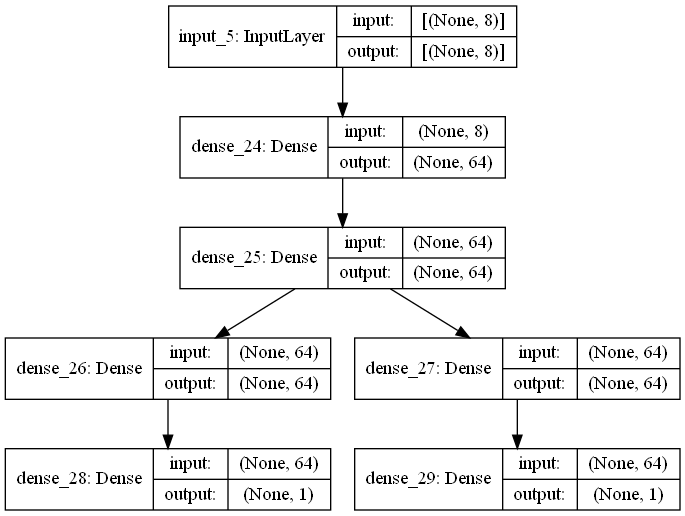

In [15]:
dnn_model.summary()
keras.utils.plot_model(dnn_model, "multi_input_and_output_model.png", show_shapes=True)


# Model Evaluation

In [16]:

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 119.26896667480469 - Accuracy: 2082.6087951660156%
------------------------------------------------------------------------
> Fold 2 - Loss: 123.25942993164062 - Accuracy: 2655.483818054199%
------------------------------------------------------------------------
> Fold 3 - Loss: 162.45343017578125 - Accuracy: 6460.829925537109%
------------------------------------------------------------------------
> Fold 4 - Loss: 113.86734008789062 - Accuracy: 1873.457145690918%
------------------------------------------------------------------------
> Fold 5 - Loss: 112.49014282226562 - Accuracy: 1480.752944946289%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 2910.6265258789062 (+- 1815.208755120155)
> Loss: 126.26786193847656
---------------------------

None


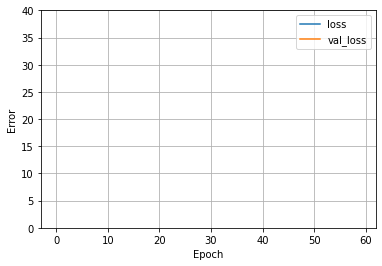

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 40])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
print(plot_loss(history))

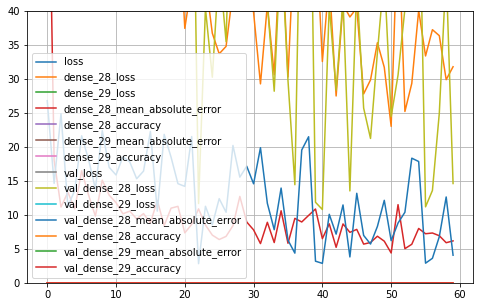

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 40) 
plt.show()

In [19]:
dnn_model.evaluate(test_features, y=(test_labels_0,test_labels_1), verbose=0)

[112.49014282226562,
 14.80752944946289,
 97.6826171875,
 5.024895668029785,
 0.0,
 2423.097900390625,
 0.0]

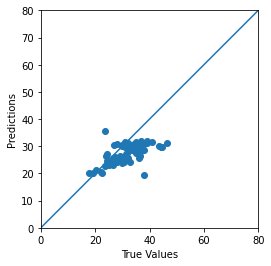

In [28]:
test_predictions = dnn_model.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels_0, test_predictions[0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0,80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [34]:
np.random.__RandomState_ctor

<function numpy.random.__RandomState_ctor()>